In [23]:
import os

import pandas as pd
import numpy as np

from GENE_sim_tools.GENE_sim_reader.src.dict_simulation_data import filepath_to_simulation_dict_list, sim_filepath_to_df
from GENE_sim_tools.GENE_sim_reader.src.utils.file_functions import string_to_list


In [70]:
def simulation_bundler(input_sim_df_list:list, input_group_by:list, input_bundle_outputs:list=['kymin', 'gamma', 'omega']):

    # Convert stringss to list if necessary
    group_by = string_to_list(input_group_by)    
    bundle_outputs = string_to_list(input_bundle_outputs)

    # Check if the input not a list and convert it to one if needed
    if not isinstance(input_sim_df_list, list):
        input_sim_df_list = [input_sim_df_list]

    # Check that all objects into simulation list are dataframe objects
    for ind, sim_df in enumerate(input_sim_df_list):
        if not isinstance(sim_df, pd.DataFrame):
            raise ValueError(f'Please ensure the object in the {ind} place of the input_sim_list is a pandas Dataframe.')

    # Combine all dataframes
    combined_df = pd.concat(input_sim_df_list, ignore_index=True)

    # Initialize an empty DataFrame to store results
    bundled_df = pd.DataFrame(columns=group_by + bundle_outputs)

    # Iterate over unique groups and bundle outputs
    for name, group in combined_df.groupby(group_by):
        # For simplicity, name will be a tuple if group_by has more than one column
        row = list(name) if isinstance(name, tuple) else [name]
        for col in bundle_outputs:
            # Collect unique values in this column into a list
            bundled_list = list(group[col])
            # Convert the list to a numpy array
            bundled_array = np.array(bundled_list)
            row.append(bundled_array)
        bundled_df.loc[len(bundled_df)] = row

    return bundled_df, group_by, bundle_outputs


In [71]:
base_path_132588_q_4 = '/pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q=4_MTM_mode'

# Base kymin scans path
kymin_path = os.path.join(base_path_132588_q_4, 'kymin_scan')

# theta_0 (kx_center) scans
kx_center_path = os.path.join(base_path_132588_q_4, 'kx_center_scan')
# B_parallel false paths
bpar_F_path = os.path.join(base_path_132588_q_4, 'bpar_check')


# Convergence checks
nz0_0 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nz0_256')
nz0_1 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nz0_64')

nx0_0 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nx0_14')
nx0_1 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nx0_20')
nx0_paths = [nx0_0, kymin_path]

nv0_0 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nv0_72')
nv0_paths = [nv0_0, kymin_path]

nw0_0 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nw0_16')
nw0_paths = [nw0_0, kymin_path]

In [97]:


criteria = ['kymin<1', 'gamma', 'omega']

nz0_0_df = sim_filepath_to_df(nz0_0, criteria_list=criteria)
kymin_path_df = sim_filepath_to_df(kymin_path, criteria_list=criteria)



input_sims = [kymin_path_df, nz0_0_df]
# input_sims = [kymin_path, nz0_0, nz0_1, nx0_0_df, nv0_0]


bundled_sims, group_by, y = simulation_bundler(input_sim_df_list=input_sims, input_group_by=['nz0', 'nx0', 'nv0', 'hyp_z'])

bundled_sims


,nz0,nx0,nv0,hyp_z,kymin,gamma,omega
0,128,7,36,-2.0,"[0.5, 0.7, 0.1, 0.2, 0.4, 0.4, 0.8, 0.05, 0.15...","[0.071, 0.073, 0.029, 0.027, 0.035, 0.035, 0.0...","[-2.858, -3.769, -0.717, -1.353, -2.36, -2.36,..."
1,256,7,36,-8.0,[0.2],[-0.006],[-1.238]
2,256,7,36,-2.0,"[0.4, 0.7, 0.2, 0.15, 0.2, 0.3, 0.5]","[0.035, 0.075, -0.006, 0.0, -0.006, 0.008, 0.072]","[-2.362, -3.768, -1.239, 0.0, -1.239, -1.813, ..."
3,256,7,36,-1.0,[0.2],[0.027],[-1.353]
4,256,7,36,1.0,[0.2],[0.125],[-1.635]
5,256,7,36,2.0,[0.2],[0.08],[-1.593]
6,256,7,36,8.0,[0.2],[0.033],[-1.452]


In [125]:
import pandas as pd
import numpy as np

def sort_by_kymin_column(input_df):

    rearranged_df = input_df.copy()

    # Ensure the 'kymin' column exists
    if 'kymin' not in rearranged_df.columns:
        raise ValueError("DataFrame must contain 'kymin' column")
    

    columns_to_rearrange = set()  # Use a set for dynamic additions
    for _, row in rearranged_df.iterrows():
        for col in rearranged_df.columns:
            if col != 'kymin' and isinstance(row[col], (list, np.ndarray)):
                columns_to_rearrange.add(col)

    print(list(columns_to_rearrange))

    # Iterate over rows in DataFrame
    for index, row in rearranged_df.iterrows():
        # Get the sorting order from 'kymin' column
        sort_order = np.argsort(row['kymin'])
        # Rearrange 'kymin' column and other identified columns by the sort order
        rearranged_df.at[index, 'kymin'] = np.array(row['kymin'])[sort_order].tolist()
        for col in columns_to_rearrange:
            rearranged_df.at[index, col] = np.array(row[col])[sort_order].tolist()

    return rearranged_df

# Example usage with your DataFrame creation code here



In [126]:
df1 = sort_by_kymin_column(bundled_sims)

df1

['gamma', 'omega']


,nz0,nx0,nv0,hyp_z,kymin,gamma,omega
0,128,7,36,-2.0,"[0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.4, 0.5, 0.7...","[0.013, 0.029, 0.032, 0.027, 0.01, 0.035, 0.03...","[-0.38, -0.717, -1.039, -1.353, -1.814, -2.36,..."
1,256,7,36,-8.0,[0.2],[-0.006],[-1.238]
2,256,7,36,-2.0,"[0.15, 0.2, 0.2, 0.3, 0.4, 0.5, 0.7]","[0.0, -0.006, -0.006, 0.008, 0.035, 0.072, 0.075]","[0.0, -1.239, -1.239, -1.813, -2.362, -2.859, ..."
3,256,7,36,-1.0,[0.2],[0.027],[-1.353]
4,256,7,36,1.0,[0.2],[0.125],[-1.635]
5,256,7,36,2.0,[0.2],[0.08],[-1.593]
6,256,7,36,8.0,[0.2],[0.033],[-1.452]


In [127]:
ind = 6

print(bundled_sims['kymin'][0][ind])
print(bundled_sims['gamma'][0][ind])



0.8
0.047


In [128]:
print(df1['kymin'][0])
print(df1['gamma'][0])

[0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.4, 0.5, 0.7, 0.8]
[0.013, 0.029, 0.032, 0.027, 0.01, 0.035, 0.035, 0.071, 0.073, 0.047]


In [100]:
group_by

['nz0', 'nx0', 'nv0', 'hyp_z']

In [101]:
y

['kymin', 'gamma', 'omega']

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_kymin_vs_gamma_omega_scatter(df, group_by):

    # Creating subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))


    for i, row in df.iterrows():

        # label = f'nz0={row["nz0"]}, nx0={row["nx0"]}'
        f_string_parts = [f'{var_name}={{row[{var_name}]}}' for var_name in group_by]
        f_string_format = ", ".join(f_string_parts)
        label = f_string_format.format(row=row)


        # Scatter plot for kymin vs gamma
        axs[0].scatter(row['kymin'], row['gamma'], label=label)
        axs[0].plot(row['kymin'], row['gamma'], linestyle='-', marker=None)  # Add lines
        axs[0].set_title('kymin vs gamma')
        axs[0].set_xlabel('kymin')
        axs[0].set_ylabel('gamma')
        axs[0].set_xscale('log')
        

        # Scatter plot for kymin vs omega
        axs[1].scatter(row['kymin'], row['omega'], label=label)
        axs[1].set_title('kymin vs omega')
        axs[1].set_xlabel('kymin')
        axs[1].set_ylabel('omega')
        axs[1].set_xscale('log')

    # Adding legends
    axs[0].legend(loc='upper right', title='Parameters')
    axs[1].legend(loc='upper right', title='Parameters')

    # Show plot
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming df is your DataFrame
# plot_kymin_vs_gamma_omega_scatter(df)


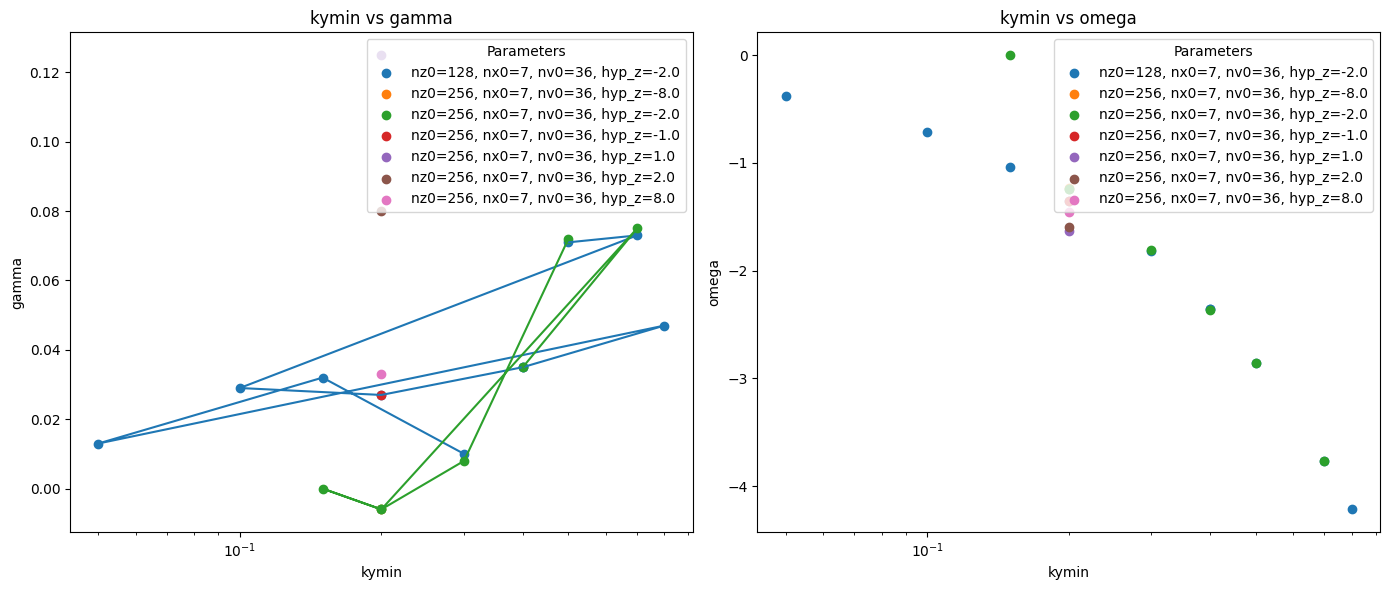

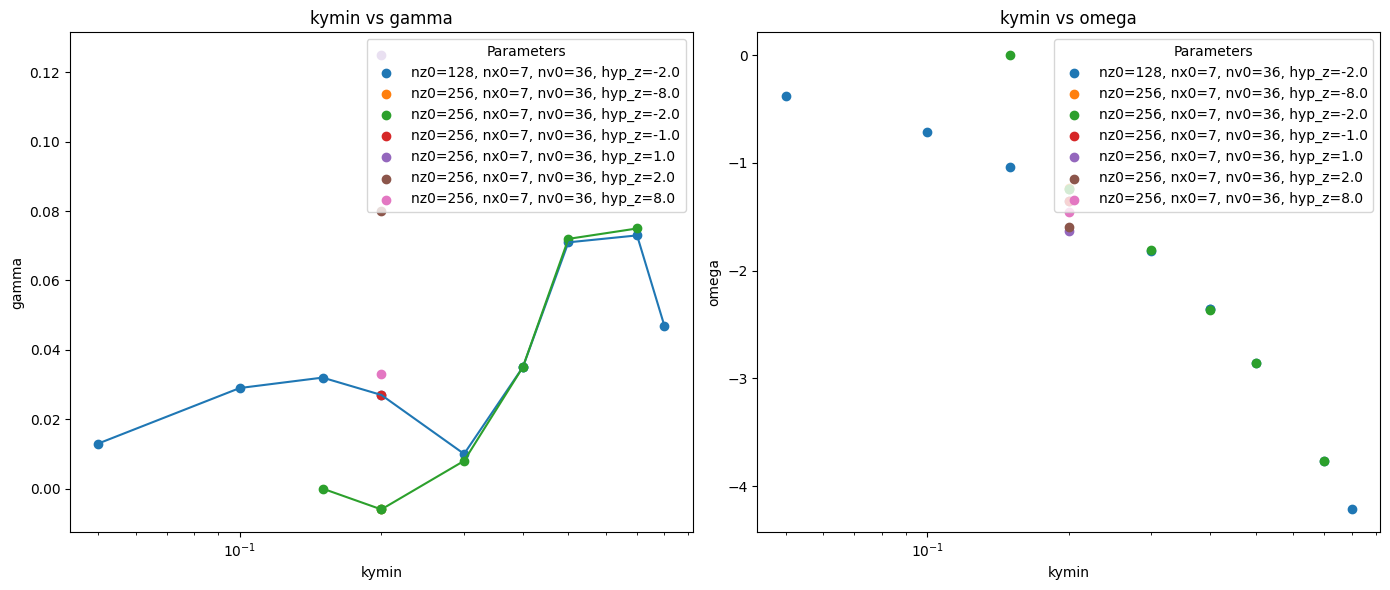

In [130]:
plot_kymin_vs_gamma_omega_scatter(bundled_sims, group_by)

plot_kymin_vs_gamma_omega_scatter(df1, group_by)

